## I. Importing essential libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

['.ipynb_checkpoints', 'heart.csv', 'Heart_disease_prediction (1).ipynb', 'Heart_disease_prediction_2.ipynb', 'pics', 'PML_final.pptx', 'pml_report.docx', 'PythonMachineLearning.docx']


## II. Importing and understanding our dataset 

In [57]:
dataset = pd.read_csv(r"heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [58]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [59]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [60]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


#### Description

In [62]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [65]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [66]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [67]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

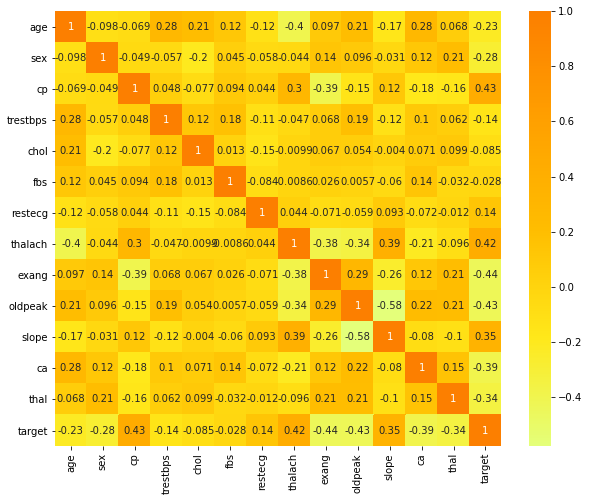

In [68]:
# correlation plot
corr = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [69]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [70]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [71]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

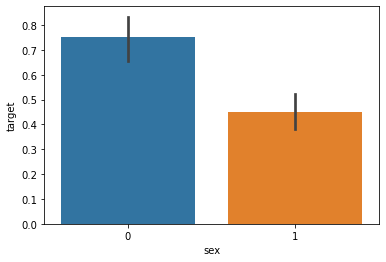

In [72]:
sns.barplot(dataset["sex"],y=dataset["target"])

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [73]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

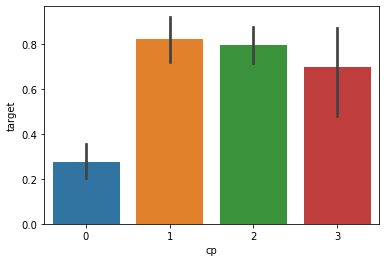

In [74]:
sns.barplot(dataset["cp"],y=dataset["target"])

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [75]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [76]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

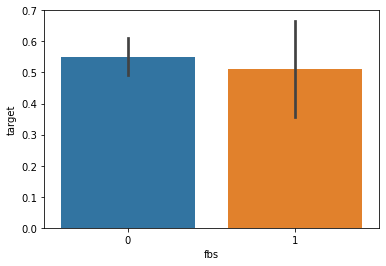

In [77]:
sns.barplot(dataset["fbs"],y=dataset["target"])

##### Nothing extraordinary here

### Analysing the restecg feature

In [78]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

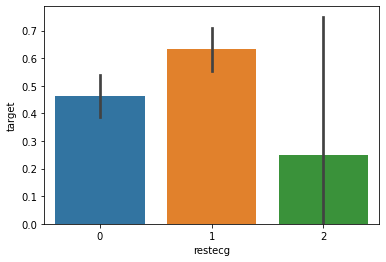

In [79]:
sns.barplot(dataset["restecg"],y=dataset["target"])

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

## IV. Train Test split

In [80]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [81]:
X_train.shape

(242, 13)

In [82]:
X_test.shape

(61, 13)

In [83]:
y_train.shape

(242,)

In [84]:
y_test.shape

(61,)

## V. Model Fitting

In [114]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [116]:
y_pred_lr.shape

(76,)

In [156]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

#print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print('Accuracy score achieved using Logistic Regression is: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, y_pred_lr,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, y_pred_lr,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, y_pred_lr,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")



Accuracy score achieved using Logistic Regression is: 86.84 %
Precision: 86.89 %
Recall: 86.84 %
F1 score: 86.81 %


In [89]:
class Logistic_Regression():
    # declaring learning rate & number of iterations (Hyperparameters)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # fit function to train the model with dataset
    def fit(self, X, y):
        # number of data points in the dataset (number of rows)  -->  m
        # number of input features in the dataset (number of columns)  --> n
        self.m, self.n = X.shape

        # initiating weight & bias value
        self.w = np.zeros(self.n)  # initial vector with zeros
        self.b = 0

        self.X = X
        self.y = y

        # implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        # Y_hat formula (sigmoid function)
        y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))

        # derivatives
        dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.y))  # 1/m((X)T * (A - Y))
        db = (1 / self.m) * np.sum(y_hat - self.y)  # 1/m(A - Y)

        # updating the weights & bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Sigmoid Equation & Decision Boundary
    def predict(self, X):
        y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return y_pred


In [157]:
# initialize logistic regression model
logreg = Logistic_Regression(0.1,2000)

# fit the model to the training data
logreg.fit(X_train, y_train)

# predict on test data
y_pred = logreg.predict(X_test)

# print accuracy
#print('accuracy_score')
#print(accuracy_score(y_test,y_pred))


# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy accuracy score achieved: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, y_pred,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, y_pred,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, y_pred,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy accuracy score achieved: 64.47 %
Precision: 76.67 %
Recall: 64.47 %
F1 score: 61.36 %


In [154]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
scaler = StandardScaler()
#to have all the features on the same scale used the standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with tuned hyperparameters
logreg = Logistic_Regression(learning_rate=0.1, no_of_iterations=2000)

# Fit the model to the scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred = logreg.predict(X_test_scaled)

# Calculate and print accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy accuracy score achieved:', accuracy)


# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy accuracy score achieved: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, y_pred,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, y_pred,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, y_pred,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy accuracy score achieved: 85.53 %
Precision: 85.52 %
Recall: 85.53 %
F1 score: 85.51 %


### SVM

In [135]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

In [136]:
y_pred_svm.shape

(76,)

In [161]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

#print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, y_pred_svm)*100,2)
print('Accuracy score achieved using Linear SVM is: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, y_pred_svm,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, y_pred_svm,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, y_pred_svm,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy score achieved using Linear SVM is: 86.84 %
Precision: 86.89 %
Recall: 86.84 %
F1 score: 86.81 %


In [139]:
#

# Load the dataset
data = pd.read_csv(r"heart.csv")

# Separate the features (X) and target variable (y)
X = data.drop('target', axis=1).values
y = data['target'].values


In [140]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [160]:
class SVM:
    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None

    def initialize_parameters(self, X):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

    def gradient_descent(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - x * y_[i]
                db = y_[i]
            self.update_parameters(dw, db)

    def update_parameters(self, dw, db):
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

    def fit(self, X, y):
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X, y)

    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        label_signs = np.sign(output)
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

model = SVM()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score_custom_svm = round(accuracy_score(predictions, y_test) * 100, 2)
#print("The accuracy score achieved using Custom SVM is: " + str(score_custom_svm) + " %")



# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, predictions)*100,2)
print('Accuracy  score achieved using Custom SVM is: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, predictions,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, predictions,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, predictions,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy  score achieved using Custom SVM is: 67.11 %
Precision: 75.69 %
Recall: 67.11 %
F1 score: 65.24 %


### K Nearest Neighbors

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [147]:
y_pred_knn.shape

(76,)

In [159]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

#print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print('Accuracy score achieved using KNN is: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, y_pred_knn,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, y_pred_knn,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, y_pred_knn,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy score achieved using KNN is: 72.37 %
Precision: 72.47 %
Recall: 72.37 %
F1 score: 72.1 %


In [149]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common)
        return np.array(y_pred)


In [152]:

knn = KNN(k=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)


# accuracy: (tp + tn) / (p + n)
accuracy = round(accuracy_score(y_test, predictions)*100,2)
print('Accuracy accuracy score achieved: ' +str(accuracy)+" %")

# precision tp / (tp + fp)
precision = round(precision_score(y_test, predictions,average='weighted')*100,2)
print('Precision: '+str(precision)+" %")


# recall: tp / (tp + fn)
recall = round(recall_score(y_test, predictions,average='weighted')*100,2)
print('Recall: '+str(recall)+" %")

# f1: 2 tp / (2 tp + fp + fn)
f1 = round(f1_score(y_test, predictions,average='weighted')*100,2)
print('F1 score: '+str(f1)+" %")

Accuracy accuracy score achieved: 67.11 %
Precision: 67.42 %
Recall: 67.11 %
F1 score: 67.16 %
